**Modelos no supervisados**

- No tienen una variable objetivo: no target
- Estos modelos pertenecen al campo de la estadística descriptiva: k-means, AGNES, DIANA, reglas de asociación.
- Modelos de segmentación (clúster) su objetivo es la identificación de patrones ocultos en los datos.
- Modelos para sistemas de recomendación (regla de asociación) cuyo objetivo es la identificación de asociaciones en una data transaccional.

In [ ]:
Data transaccional: Spotify

In [ ]:
ID       Itemset
201512   Corazón partido (A.S.), Amiga mia (A.S.)

In [ ]:
- Daniel    ii
- Oliver    iiii
- Enrique   i
- Marin     ii
- Ronaldo   iii
-
-
-
-

**K-means**

**Objetivo**: identificar subpoblaciones homogéneas (características comunes) en el conjunto de datos

In [1]:
dicc = {"ingreso":[1800,1500,4500,950,5000],
       "experiencia":[24,22,56,9,65]}

In [2]:
import pandas as pd
data = pd.DataFrame(dicc)

In [3]:
data

ingreso  experiencia
0     1800           24
1     1500           22
2     4500           56
3      950            9
4     5000           65

**Paso 1: escalamiento de los datos**

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
std = StandardScaler()

In [6]:
data_std =std.fit_transform(data)

In [7]:
data_std

array([[-0.57121226, -0.52143245],
       [-0.75159507, -0.61454539],
       [ 1.0522331 ,  0.96837455],
       [-1.08229691, -1.21977948],
       [ 1.35287113,  1.38738276]])

**Paso 2: representación gráfica de las observaciones**

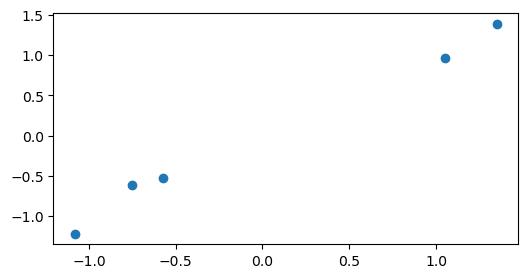

In [9]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(6,3))
ax.scatter(data_std[:,0],data_std[:,1])
plt.show()

**Paso 3: identificar el número óptimo de k grupos**

In [12]:
from sklearn.metrics import euclidean_distances, silhouette_score
from sklearn.cluster import KMeans

- euclidean_distances(): función para calcular la distancia de las observaciones a los centros.
- silhouette_score(): función para determinar el número óptimo de grupos o segmentos por coeficiente de Silueta.
- KMeans(): función para aplicar el algoritmo de KMeans.

In [22]:
kmeans_model = KMeans(n_clusters=3,#número de clusters a formar
                     init="k-means++", #modelo
                     max_iter=300, #máximo número de iteraciones de los centros iniciales
                     n_init=10, #máximo número de iteraciones de las observaciones
                     random_state=2023) #semilla

In [23]:
kmeans_model.fit(data_std)

KMeans(n_clusters=3, random_state=2023)

In [24]:
clusters = kmeans_model.predict(data_std) + 1

In [25]:
print(clusters)

[1 1 2 3 2]


In [26]:
data["cluster"]=clusters

In [27]:
data

ingreso  experiencia  cluster
0     1800           24        1
1     1500           22        1
2     4500           56        2
3      950            9        3
4     5000           65        2

In [28]:
silhouette_score(data_std,#datos escalados
                 clusters)#etiqueta de cluster

0.6126686841925183

**Nota**: mientras más cercano al valor de "1" sea el coeficiente de silueta es mejor el agrupamiento de las observaciones.

**Nota**: en resumen el coeficiente de silueta nos va a indicar en cuántos clusters debemos particionar nuestros datos.

In [31]:
import numpy as np

In [32]:
k_range = [2,3,4] #definiendo los posibles valores que tomaría k (segmentos)
silhouette_scores = [] #crea un objeto lista vacío donde se guardarán los valores 
for k in k_range:
    # Crea un modelo de KMeans con el valor de K actual
    kmeans = KMeans(n_clusters=k)
    # Ajusta el modelo a los datos
    kmeans.fit(data_std)
    # Calcula el coeficiente de silueta para el modelo actual
    silhouette = silhouette_score(data_std, kmeans.labels_)
    # Agrega el coeficiente de silueta a la lista
    silhouette_scores.append(silhouette)#append() agregar a un objeto valores

# Encuentra el valor de K con el coeficiente de silueta más alto
best_k = k_range[np.argmax(silhouette_scores)]

In [33]:
best_k

2

**Paso 4: identificar los k grupos**

In [39]:
kmeans_model = KMeans(n_clusters=best_k,#ingresar el k óptimo
                     init="k-means++", 
                     max_iter=300, 
                     n_init=10, 
                     random_state=2023)

In [40]:
data["cluster"]=kmeans_model.fit_predict(data_std)+1

In [41]:
data

ingreso  experiencia  cluster
0     1800           24        1
1     1500           22        1
2     4500           56        2
3      950            9        1
4     5000           65        2

**Paso 5: Perfilamiento de los grupos**

**¿Realmente las variables consideradas en la segmentación de los datos ayudan?**

In [42]:
data.groupby(["cluster"]).mean().round(1)

ingreso  experiencia
cluster                      
1         1416.7         18.3
2         4750.0         60.5

**Refinamiento del modelo**